# Data fields:

## Data Dictionary:

Variable&emsp;&emsp;&emsp;&emsp;Definition&emsp;&emsp;&emsp;&emsp;Key  
survival&emsp;&emsp;&emsp;&emsp;Survival&emsp;&emsp;&emsp;&emsp;0 = No, 1 = Yes  
pclass&emsp;&emsp;&emsp;&emsp;Ticket class&emsp;&emsp;&emsp;&emsp;1 = 1st, 2 = 2nd, 3 = 3rd  
sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Sex  	
Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;in years  	
sibsp&emsp;&emsp;&emsp;# of siblings / spouses aboard the Titanic  
parch&emsp;&emsp;&emsp;# of parents / children aboard the Titanic  
ticket&emsp;&emsp;&emsp;&emsp;&emsp;Ticket number  
fare&emsp;&emsp;&emsp;&emsp;&emsp;Passenger fare  
cabin&emsp;&emsp;&emsp;&emsp;&emsp;Cabin number  	
embarked&emsp;&emsp;&emsp;Port of Embarkation&emsp;&emsp;C = Cherbourg, Q = Queenstown, S = Southampton  

## Variable Notes:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.


# Importation Datas

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import stats

%matplotlib inline
sns.set()

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It seems there are NaN values in Age and Embarked columns.**

# EDA

## Use PassengerID column like index

In [7]:
df = df.set_index(df['PassengerId'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove PassengerId column

In [8]:
df = df.drop(labels='PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove Name column

In [9]:
df = df.drop(labels='Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Remove Ticket column

In [10]:
df = df.drop(labels='Ticket', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


## Remove Cabin column

In [11]:
df = df.drop(labels='Cabin', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Univariate Analysis

## Survived distribution

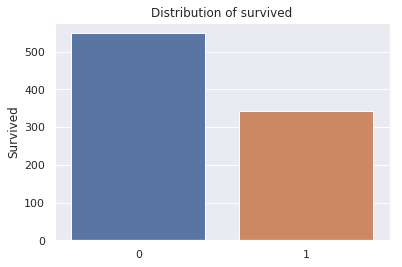

In [12]:
sns.barplot(x=df['Survived'].unique(), y=df['Survived'].value_counts())
plt.title('Distribution of survived');

In [13]:
Purcent_of_died = df['Survived'][df['Survived'] == 0].count()
Purcent_of_survived = df['Survived'][df['Survived'] == 1].count()
Total = df['Survived'].count()

print("Purcent of died: {}%".format((Purcent_of_died / Total * 100).round(0)))
print("Purcent of survived: {}%".format((Purcent_of_survived / Total * 100).round(0)))

Purcent of died: 62.0%
Purcent of survived: 38.0%


**About 2/3 of people died.**

## P-Class distribution

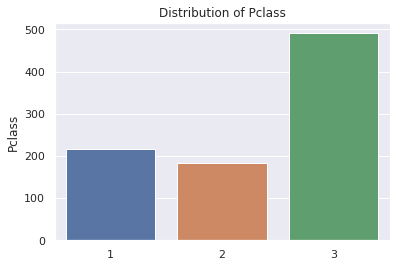

In [14]:
sns.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts())
plt.title('Distribution of Pclass');

In [15]:
Purcent_of_class_1 = df['Pclass'][df['Pclass'] == 1].count()
Purcent_of_class_2 = df['Pclass'][df['Pclass'] == 2].count()
Purcent_of_class_3 = df['Pclass'][df['Pclass'] == 3].count()
Total = df['Pclass'].count()

print("Purcent_of_class_1: {}%".format((Purcent_of_class_1 / Total * 100).round(0)))
print("Purcent_of_class_2: {}%".format((Purcent_of_class_2 / Total * 100).round(0)))
print("Purcent_of_class_3: {}%".format((Purcent_of_class_3 / Total * 100).round(0)))

Purcent_of_class_1: 24.0%
Purcent_of_class_2: 21.0%
Purcent_of_class_3: 55.0%


**More than half of people was in Pclass 3.**

## Sex distribution

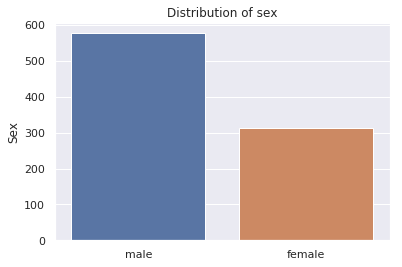

In [16]:
sns.barplot(x=df['Sex'].unique(), y=df['Sex'].value_counts())
plt.title('Distribution of sex');

In [17]:
Purcent_of_male = df['Sex'][df['Sex'] == "male"].count()
Purcent_of_female = df['Sex'][df['Sex'] == "female"].count()
Total = df['Sex'].count()

print("Purcent_of_male: {}%".format((Purcent_of_male / Total * 100).round(0)))
print("Purcent_of_female: {}%".format((Purcent_of_female / Total * 100).round(0)))

Purcent_of_male: 65.0%
Purcent_of_female: 35.0%


**About 2/3 of male of board.**

## Age distribution

### Missing values Imputation on Age column with median

In [18]:
df['Age'].isnull().values.any()

True

In [19]:
imput_value = df['Age'].median()

In [20]:
df.loc[df['Age'].isna(), 'Age'] = imput_value

In [21]:
df['Age'].isnull().values.any()

False

In [22]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


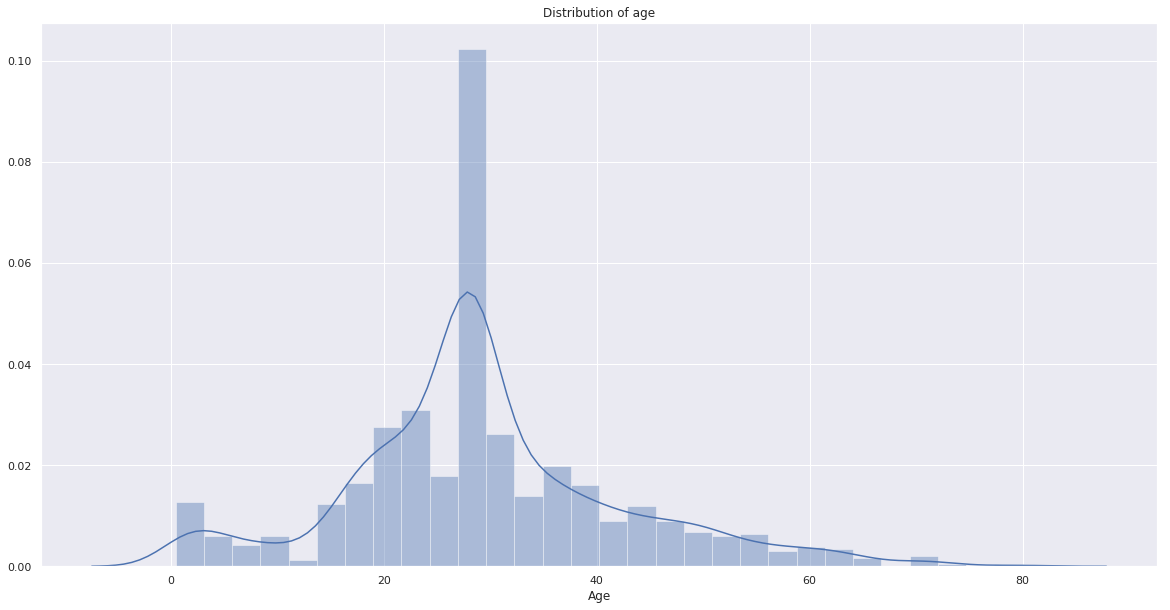

In [23]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Age'])
plt.title('Distribution of age');

**High representation around 30.**

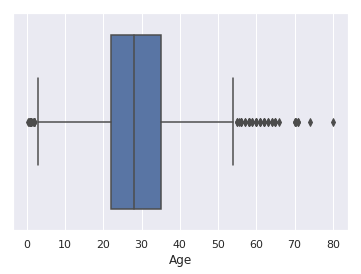

In [24]:
sns.boxplot(df['Age']);

## Interquartile Range

In [25]:
Q1 = 22.0
Q3 = 35.0
IQR = Q3 - Q1
IQR

13.0

In [26]:
low_IQR = Q1 - (1.5 * IQR)
low_IQR

2.5

**All people younger than 3 are outliers.**

In [27]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

54.5

**All people older than 55 are outliers.**

In [28]:
young_outliers = df['Age'][df['Age'] <= 3].count()
old_outliers = df['Age'][df['Age'] >= 55].count()
print("Young outliers: {} and old outliers: {}".format(young_outliers, old_outliers))
Total_age_outliers = young_outliers + old_outliers
print("Total age outliers: {}".format(Total_age_outliers))

Young outliers: 30 and old outliers: 42
Total age outliers: 72


**There is about 8% of outliers (72/891).**

## Sibling/Spouse distribution

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

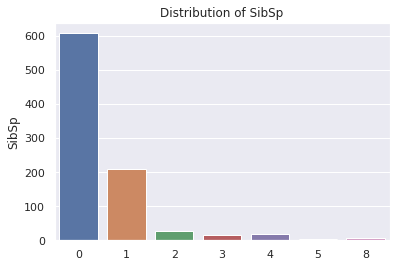

In [29]:
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts())
plt.title('Distribution of SibSp');

In [30]:
Purcent_of_SibSp_0 = df['SibSp'][df['SibSp'] == 0].count()
Purcent_of_SibSp_1 = df['SibSp'][df['SibSp'] == 1].count()
Purcent_of_SibSp_2 = df['SibSp'][df['SibSp'] == 2].count()
Purcent_of_SibSp_3 = df['SibSp'][df['SibSp'] == 3].count()
Purcent_of_SibSp_4 = df['SibSp'][df['SibSp'] == 4].count()
Purcent_of_SibSp_5 = df['SibSp'][df['SibSp'] == 5].count()
Purcent_of_SibSp_8 = df['SibSp'][df['SibSp'] == 8].count()

Total = df['SibSp'].count()


print("Purcent_of_SibSp_0: {}%".format((Purcent_of_SibSp_0 / Total * 100).round(0)))
print("Purcent_of_SibSp_1: {}%".format((Purcent_of_SibSp_1 / Total * 100).round(0)))
print("Purcent_of_SibSp_2: {}%".format((Purcent_of_SibSp_2 / Total * 100).round(0)))
print("Purcent_of_SibSp_3: {}%".format((Purcent_of_SibSp_3 / Total * 100).round(0)))
print("Purcent_of_SibSp_4: {}%".format((Purcent_of_SibSp_4 / Total * 100).round(0)))
print("Purcent_of_SibSp_5: {}%".format((Purcent_of_SibSp_5 / Total * 100).round(0)))
print("Purcent_of_SibSp_8: {}%".format((Purcent_of_SibSp_8 / Total * 100).round(0)))

Purcent_of_SibSp_0: 68.0%
Purcent_of_SibSp_1: 23.0%
Purcent_of_SibSp_2: 3.0%
Purcent_of_SibSp_3: 2.0%
Purcent_of_SibSp_4: 2.0%
Purcent_of_SibSp_5: 1.0%
Purcent_of_SibSp_8: 1.0%


**It seems about 7/10 people was single on board (and without brother or sister).**

## Parch distribution

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

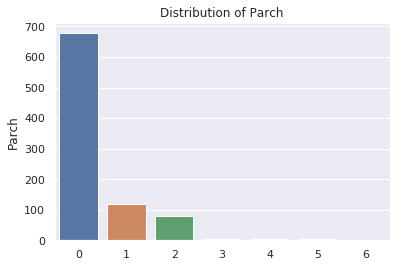

In [31]:
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts())
plt.title('Distribution of Parch');

In [32]:
Purcent_of_Parch_0 = df['Parch'][df['Parch'] == 0].count()
Purcent_of_Parch_1 = df['Parch'][df['Parch'] == 1].count()
Purcent_of_Parch_2 = df['Parch'][df['Parch'] == 2].count()
Purcent_of_Parch_3 = df['Parch'][df['Parch'] == 3].count()
Purcent_of_Parch_4 = df['Parch'][df['Parch'] == 4].count()
Purcent_of_Parch_5 = df['Parch'][df['Parch'] == 5].count()
Purcent_of_Parch_6 = df['Parch'][df['Parch'] == 6].count()

Total = df['Parch'].count()


print("Purcent_of_Parch_0: {}%".format((Purcent_of_Parch_0 / Total * 100).round(0)))
print("Purcent_of_Parch_1: {}%".format((Purcent_of_Parch_1 / Total * 100).round(0)))
print("Purcent_of_Parch_2: {}%".format((Purcent_of_Parch_2 / Total * 100).round(0)))
print("Purcent_of_Parch_3: {}%".format((Purcent_of_Parch_3 / Total * 100).round(0)))
print("Purcent_of_Parch_4: {}%".format((Purcent_of_Parch_4 / Total * 100).round(0)))
print("Purcent_of_Parch_5: {}%".format((Purcent_of_Parch_5 / Total * 100).round(0)))
print("Purcent_of_Parch_6: {}%".format((Purcent_of_Parch_6 / Total * 100).round(0)))

Purcent_of_Parch_0: 76.0%
Purcent_of_Parch_1: 13.0%
Purcent_of_Parch_2: 9.0%
Purcent_of_Parch_3: 1.0%
Purcent_of_Parch_4: 0.0%
Purcent_of_Parch_5: 1.0%
Purcent_of_Parch_6: 0.0%


**It seems 3/4 of people was without parents & child.**

## Fare distribution

In [33]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**It seems there are outliers in this column.**

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


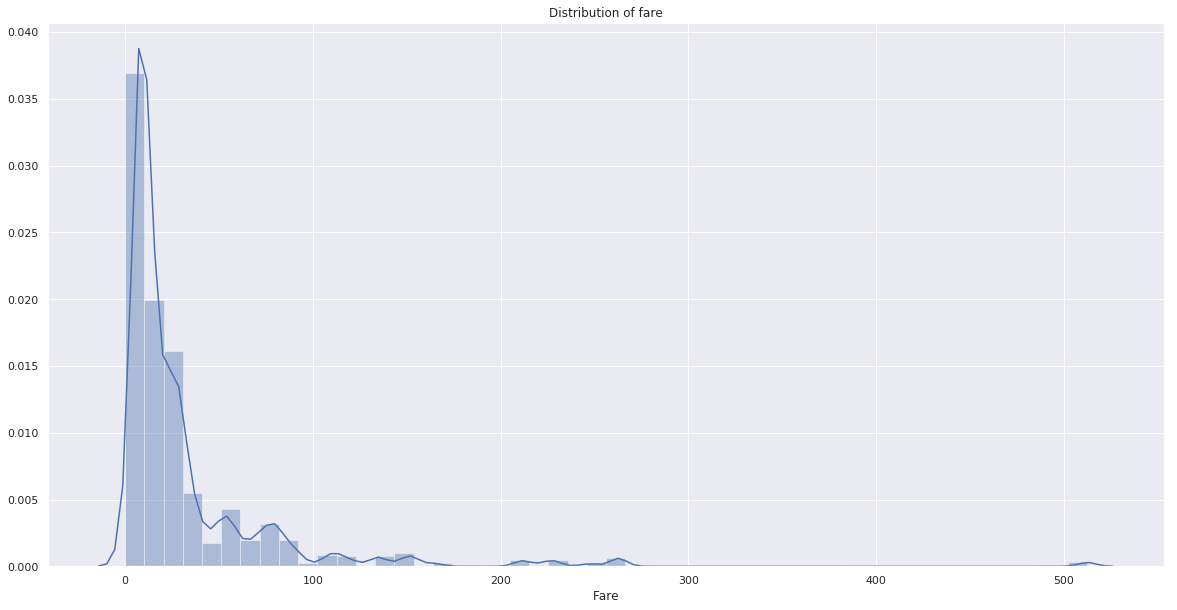

In [34]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Fare'])
plt.title('Distribution of fare');

**75% of the fare was under 31$.**

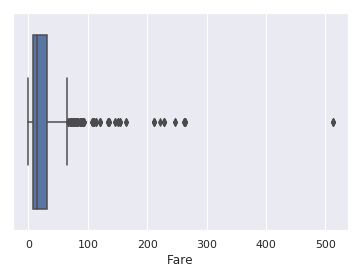

In [35]:
sns.boxplot(df['Fare']);

## Interquartile Range

In [36]:
Q1 = 7.910400
Q3 = 31.000000
IQR = Q3 - Q1
IQR

23.0896

In [37]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

65.6344

**All fares higher than 66$ are outliers.**

In [38]:
fare_outliers = df['Fare'][df['Fare'] >= 66]
fare_outliers.count()

116

**There is about 13% of outliers (116/891).**

## Embarked distribution

C = Cherbourg, Q = Queenstown, S = Southampton

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


**It seems 2 rows on this column are not available.**

In [40]:
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


**I decided to remove these two rows.**

In [41]:
df = df.drop([62, 830])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


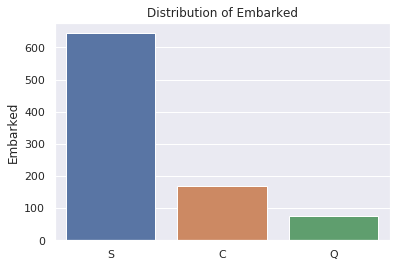

In [44]:
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts())
plt.title('Distribution of Embarked');

In [45]:
Purcent_of_Embarked_S = df['Embarked'][df['Embarked'] == 'S'].count()
Purcent_of_Embarked_C = df['Embarked'][df['Embarked'] == 'C'].count()
Purcent_of_Embarked_Q = df['Embarked'][df['Embarked'] == 'Q'].count()

Total = df['Embarked'].count()

print("Purcent_of_Embarked_S: {}%".format((Purcent_of_Embarked_S / Total * 100).round(0)))
print("Purcent_of_Embarked_C: {}%".format((Purcent_of_Embarked_C / Total * 100).round(0)))
print("Purcent_of_Embarked_Q: {}%".format((Purcent_of_Embarked_Q / Total * 100).round(0)))

Purcent_of_Embarked_S: 72.0%
Purcent_of_Embarked_C: 19.0%
Purcent_of_Embarked_Q: 9.0%


**It seems about 3/4 of people embarked at Southampton.**

# Multivariate Analysis

## Heatmap - pearson, kendall, spearman

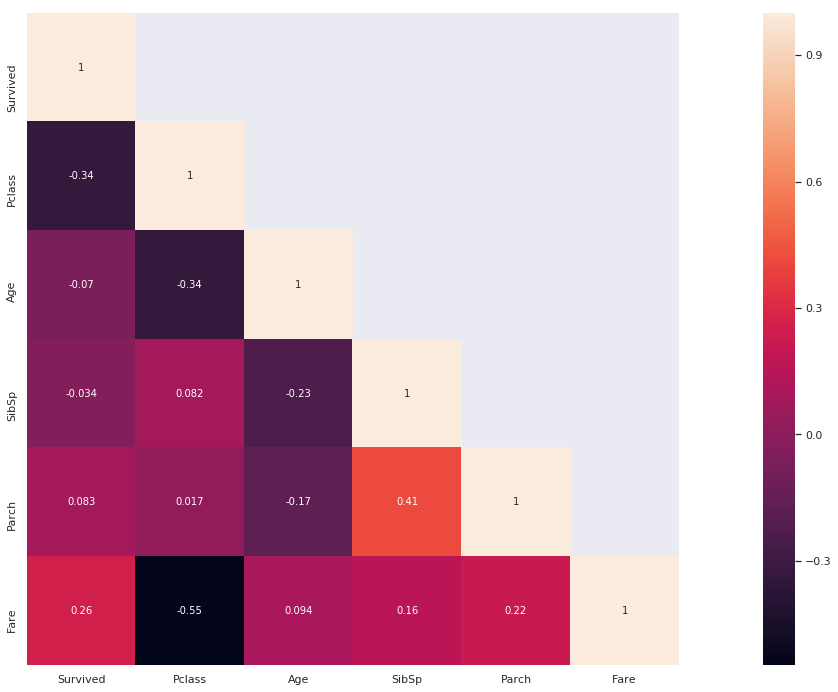

In [50]:
cor_mat = df[:].corr(method='pearson')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

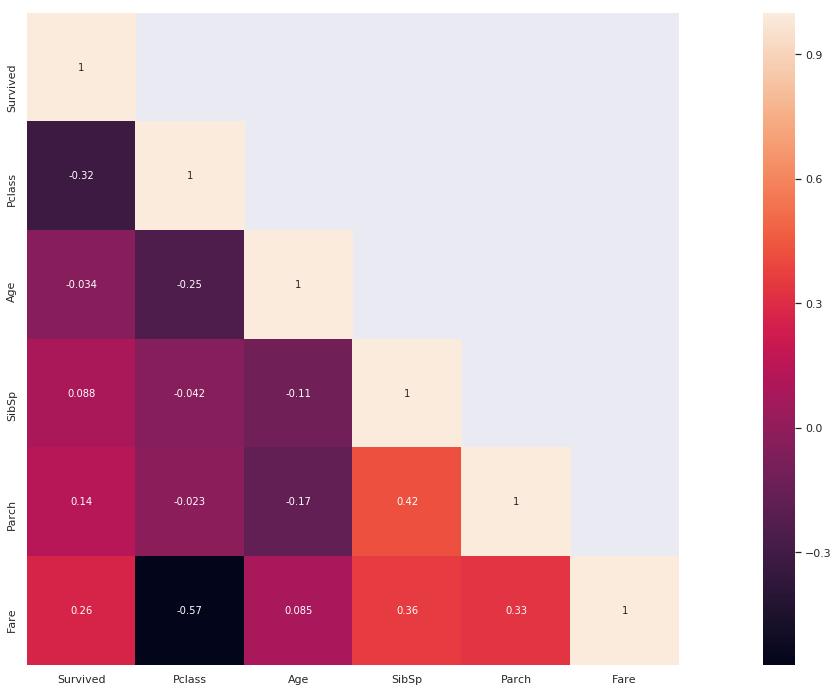

In [51]:
cor_mat = df[:].corr(method='kendall')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

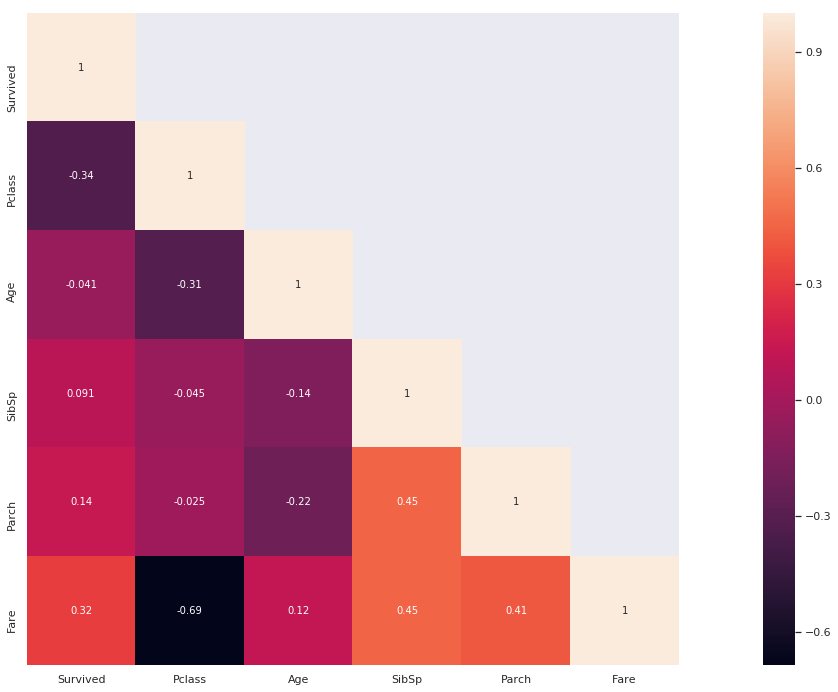

In [52]:
cor_mat = df[:].corr(method='spearman')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

## Survived Feature

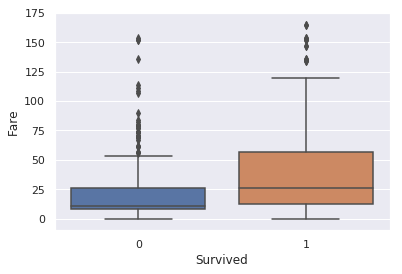

In [74]:
ax = sns.boxplot(x=df['Survived'], y=df['Fare'])
ax.set(ylim=(-10, 175));

**It seems that people who paid high fare had more chance to survive.**